# Animal Classifier AI
Classifies an animal into one of 15 categories. My test training of the model proved to be over 93% accurate.

### Train Model On Dataset

In [65]:
import tensorflow as tf
import os

batch_size = 80
img_height, img_width = 224, 224

db_dir = os.path.dirname("/kaggle/input/animal-data/animal_data/")

train_ds = tf.keras.utils.image_dataset_from_directory(
    db_dir,
    validation_split = 0.2,
    subset = "training",
    seed=123,
    image_size = (img_height, img_width),
    batch_size = batch_size,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  db_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

num_classes = 15

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes),
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
)

model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

model.save("/kaggle/working/model.keras")

print("saved to /kaggle/working/model.keras")

Found 1944 files belonging to 15 classes.
Using 1556 files for training.
Found 1944 files belonging to 15 classes.
Using 388 files for validation.
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - accuracy: 0.0782 - loss: 2.7271 - val_accuracy: 0.1727 - val_loss: 2.5215
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.2240 - loss: 2.4123 - val_accuracy: 0.2835 - val_loss: 2.1621
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.3904 - loss: 1.9491 - val_accuracy: 0.4149 - val_loss: 1.9213
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.5399 - loss: 1.5553 - val_accuracy: 0.4098 - val_loss: 1.9473
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.6299 - loss: 1.3228 - val_accuracy: 0.4485 - val_loss: 2.0065
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.6850 - loss: 1.0312 - val_accuracy: 0.5619 - val_loss: 1.7876
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.7744 - loss: 0.8399 - val_accurac

### Test of Model With Display

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_12 (Rescaling)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,371,055 (31.93 MB)

 Trainable params: 2,790,351 (10.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,580,704 (21.29 MB)

Image: /kaggle/input/animal-data/animal_data/Dog/Dog_19_1.jpg


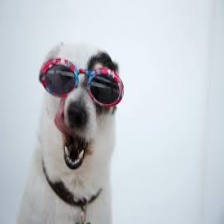

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Prediction: Dog
Prediction (raw): [[  1.4107231   2.0057428   7.3919253  -1.8376181  -2.973745   12.138315
    3.8024457  -3.2469552   3.8244362  -4.046919   -3.3398256   2.678106
   -1.9702865  -7.3113947 -10.36629  ]]


In [96]:
import tensorflow as tf
import PIL
import random
import numpy as np
import os

img_height, img_width = 224, 224

model = tf.keras.models.load_model("/kaggle/working/model.keras")

model.summary()

labels = ["Bear", "Bird", "Cat", "Cow", "Deer", "Dog", "Dolphin", "Elephant", "Giraffe", "Horse", "Kangaroo", "Lion", "Panda", "Tiger", "Zebra"]
images = []

for root, dirs, files in os.walk("/kaggle/input/animal-data/animal_data"):
    images.extend(map(lambda dir: os.path.join(root, dir), files))

image_dir = random.choice(images)
image = PIL.Image.open(image_dir)

print("Image:", image_dir)
display(image)

image_array = tf.keras.utils.img_to_array(image)
image_array = image_array.reshape(-1, 224, 224, 3)

result_raw = model.predict(image_array)
result = np.argmax(result_raw[0])
result = labels[result]

print("Prediction:", result)
print("Prediction (raw):", result_raw)